In [ ]:
import folium

# Coordenadas aproximadas dos locais em Salvador
locais = {
#    "Hotel": [-12.979596437419943, -38.45679346129667],
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Feira de São Joaquim":[-12.951175, -38.501696],
    "Pelourinho": [-12.9718, -38.5085],
    "Elevador Lacerda": [-12.9730, -38.5109],
    "Mercado Modelo": [-12.9714, -38.5124],
  #  "MAM":[-12.981757, -38.519790],
    "Solar do Unhão (MAM)": [-12.981757, -38.519790],
    "Dique do Tororó": [-12.9843, -38.5102],
    "Teatro Castro Alves":[-12.989271, -38.519646],
    "Farol da Barra": [-13.0103, -38.5327],
    "Praia do Porto da Barra": [-13.0094, -38.5290],
    "Ondina":[-13.000629, -38.507613],
    "Rio Vermelho":[-13.011990, -38.492722],
    "Jardim de Alah":[-12.997891, -38.442029],
    "Lagoa do Abaeté": [-12.9508, -38.4192],
    "Praia de Jaguaribe:":[-12.960934, -38.394672],
    "Praia de Itapuã": [-12.955157, -38.384538],
    "Stella Maris":[-12.946265, -38.337980],
    "Praia do flamengo":[-12.929112, -38.317825],
 #   "":[],
}

# Criando o mapa centrado no hotel
mapa = folium.Map(location=locais["Hotel"], zoom_start=13)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: blue;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_salvador.html")

mapa

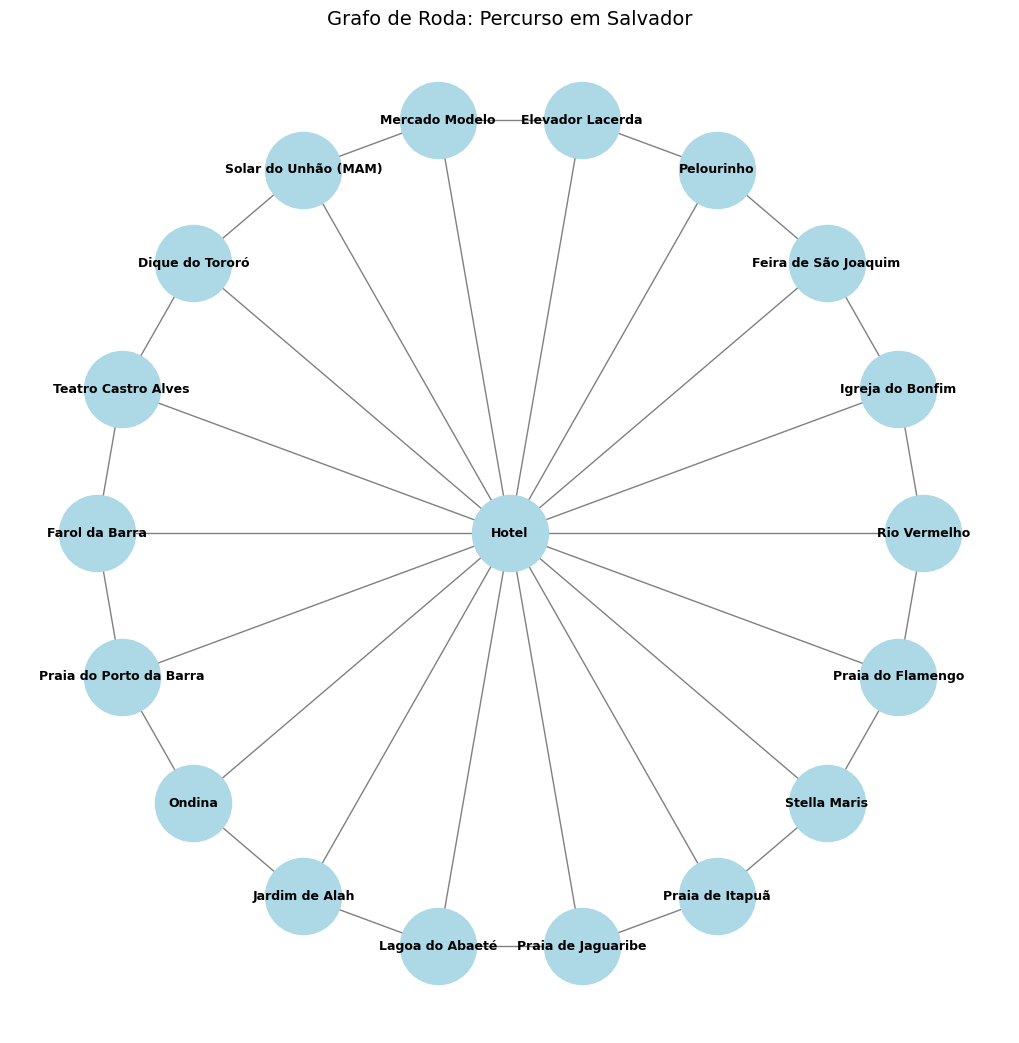

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo
G = nx.Graph()

hotel = "Hotel"
pontos = [
    "Rio Vermelho",
    "Igreja do Bonfim",
    "Feira de São Joaquim",
    "Pelourinho",
    "Elevador Lacerda",
    "Mercado Modelo",
    "Solar do Unhão (MAM)",
    "Dique do Tororó",
    "Teatro Castro Alves",
    "Farol da Barra",
    "Praia do Porto da Barra",
    "Ondina",
    "Jardim de Alah",
    "Lagoa do Abaeté",
    "Praia de Jaguaribe",
    "Praia de Itapuã",
    "Stella Maris",
    "Praia do Flamengo",
]

# Adicionando arestas entre o hotel e os pontos turísticos
for ponto in pontos:
    G.add_edge(hotel, ponto)

# Adicionando arestas entre os pontos turísticos (aro externo)
for i in range(len(pontos)):
    G.add_edge(pontos[i], pontos[(i + 1) % len(pontos)])

# Criando layout circular na ordem especificada
pos = nx.circular_layout(G)
circle_points = nx.circular_layout({p: None for p in pontos})  # Layout para os pontos
for i, ponto in enumerate(pontos):
    pos[ponto] = circle_points[ponto]

# Colocando o hotel manualmente no centro
pos[hotel] = [0, 0]

# Plotando o grafo
plt.figure(figsize=(10, 10))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=3000, font_size=9, font_weight="bold", edge_color="gray"
)
plt.title("Grafo de Roda: Percurso em Salvador", fontsize=14)
plt.show()


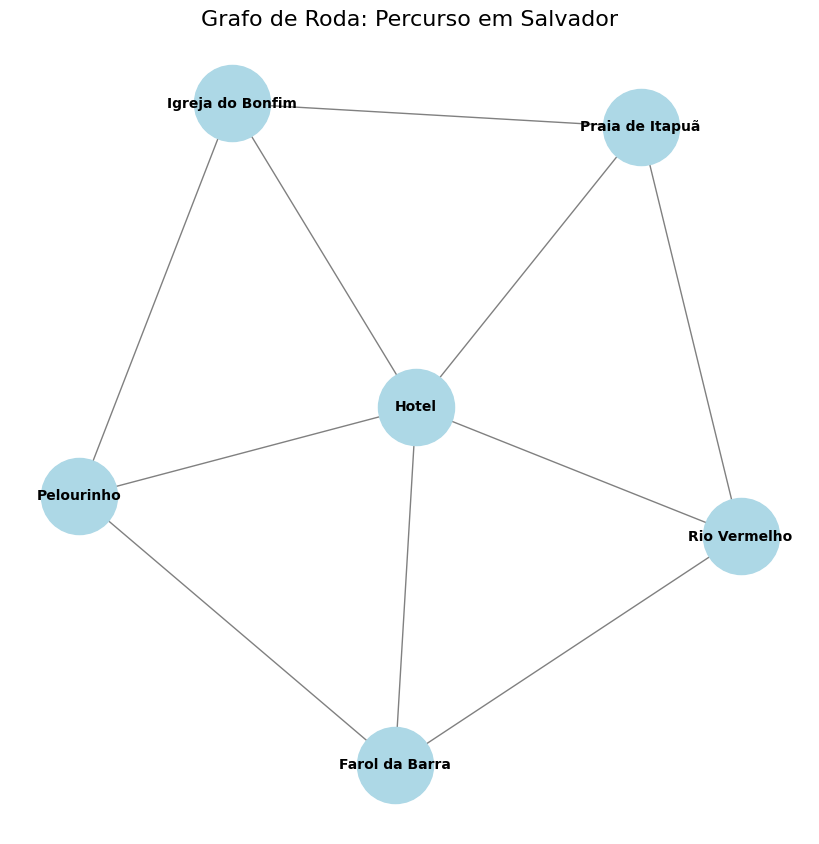

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

hotel = "Hotel"
pontos = [
    "Rio Vermelho",
    "Farol da Barra",
    "Pelourinho",
    "Igreja do Bonfim",
    "Praia de Itapuã",
#    "Rio Vermelho",
 #   "Farol da Barra",
]

for ponto in pontos:
    G.add_edge(hotel, ponto)

for i in range(len(pontos)):
    G.add_edge(pontos[i], pontos[(i + 1) % len(pontos)])

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 8))
nx.draw(
    G, pos, with_labels=True, node_color="lightblue",
    node_size=3000, font_size=10, font_weight="bold", edge_color="gray"
)
plt.title("Grafo de Roda: Percurso em Salvador", fontsize=16)
plt.show()


In [ ]:
import folium

# Coordenadas aproximadas dos locais em Salvador
locais = {
#    "Hotel": [-12.979596437419943, -38.45679346129667],
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
 #   "Praia do Porto da Barra": [-13.0094, -38.5290],
 #   "Mercado Modelo": [-12.9714, -38.5124],
    "Pelourinho": [-12.9718, -38.5085],
 #   "Elevador Lacerda": [-12.9730, -38.5109],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
#    "Lagoa do Abaeté": [-12.9508, -38.4192],
 #   "Solar do Unhão (MAM)": [-13.0062, -38.5215],
  #  "Dique do Tororó": [-12.9843, -38.5102],
    "Rio Vermelho":[-13.011990, -38.492722],
}

# Criando o mapa centrado no hotel
mapa = folium.Map(location=locais["Hotel"], zoom_start=13)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: blue;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_salvador.html")

mapa

In [ ]:
import folium

# Coordenadas aproximadas dos locais em Salvador
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
 #   "Praia do Porto da Barra": [-13.0094, -38.5290],
 #   "Mercado Modelo": [-12.9714, -38.5124],
    "Pelourinho": [-12.9718, -38.5085],
 #   "Elevador Lacerda": [-12.9730, -38.5109],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
#    "Lagoa do Abaeté": [-12.9508, -38.4192],
 #   "Solar do Unhão (MAM)": [-13.0062, -38.5215],
  #  "Dique do Tororó": [-12.9843, -38.5102],
    "Rio Vermelho":[-13.011990, -38.492722],
}

# Criando o mapa centrado no hotel com o estilo "Stamen Toner Background"
#mapa = folium.Map(
#    location=locais["Hotel"],
#    zoom_start=13,
#    tiles="Stamen Toner"
#)
#mapa = folium.Map(location=locais["Hotel"], zoom_start=13,tiles="Stamen Toner")
mapa = folium.Map(location=locais["Hotel"], zoom_start=13)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: red;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_sem_ruas.html")
mapa

In [ ]:
import folium

# Coordenadas aproximadas dos locais em Salvador
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
 #   "Praia do Porto da Barra": [-13.0094, -38.5290],
 #   "Mercado Modelo": [-12.9714, -38.5124],
    "Pelourinho": [-12.9718, -38.5085],
 #   "Elevador Lacerda": [-12.9730, -38.5109],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
#    "Lagoa do Abaeté": [-12.9508, -38.4192],
 #   "Solar do Unhão (MAM)": [-13.0062, -38.5215],
  #  "Dique do Tororó": [-12.9843, -38.5102],
    "Rio Vermelho":[-13.011990, -38.492722],
}

# Criando o mapa centrado no hotel com o estilo "Stamen Toner Background"
mapa = folium.Map(
    location=locais["Hotel"],
    zoom_start=13,
    tiles="Stamen Toner Background",
    attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: blue;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_sem_ruas.html")
mapa

In [ ]:
import folium

# Coordenadas aproximadas dos locais em Salvador
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
 #   "Praia do Porto da Barra": [-13.0094, -38.5290],
 #   "Mercado Modelo": [-12.9714, -38.5124],
    "Pelourinho": [-12.9718, -38.5085],
 #   "Elevador Lacerda": [-12.9730, -38.5109],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
#    "Lagoa do Abaeté": [-12.9508, -38.4192],
 #   "Solar do Unhão (MAM)": [-13.0062, -38.5215],
  #  "Dique do Tororó": [-12.9843, -38.5102],
    "Rio Vermelho":[-13.011990, -38.492722],
}

# Criando o mapa com o estilo "CartoDB Positron No Labels"
mapa = folium.Map(
    location=locais["Hotel"],
    zoom_start=13,
    tiles="CartoDB Positron",
    attr="Map tiles by CartoDB under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: blue;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_com_contorno.html")
mapa

In [ ]:
import folium

# Coordenadas dos locais em Salvador, incluindo o ponto "Dique"
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
    "Pelourinho": [-12.9718, -38.5085],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
    "Rio Vermelho": [-13.011990, -38.492722],
    "Dique": [-12.988419, -38.508833],  # Novo ponto
}

# Criando o mapa centrado no hotel
mapa = folium.Map(
    location=locais["Hotel"],
    zoom_start=13,
    tiles="CartoDB Positron",
    attr="Map tiles by CartoDB under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 10px; color: black;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = list(locais.keys())[1:]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Conectando o ponto "Dique" aos locais especificados
arestas_dique = ["Pelourinho", "Hotel", "Rio Vermelho", "Farol da Barra"]
for destino in arestas_dique:
    folium.PolyLine([locais["Dique"], locais[destino]], color="blue", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_com_dique.html")
mapa

In [ ]:
import folium

# Coordenadas dos locais em Salvador, incluindo o ponto "Dique"
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
    "Pelourinho": [-12.9718, -38.5085],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
    "Rio Vermelho": [-13.011990, -38.492722],
    "Dique": [-12.983945, -38.507674],
}

# Criando o mapa centrado no hotel
mapa = folium.Map(
    location=locais["Hotel"],
    zoom_start=13,
    tiles="CartoDB Positron",
    attr="Map tiles by CartoDB under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 10px; color: black;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = ["Farol da Barra",  "Pelourinho", "Igreja do Bonfim", "Praia de Itapuã", "Rio Vermelho"]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Conectando o ponto "Dique" aos locais especificados
arestas_dique = ["Pelourinho", "Hotel", "Rio Vermelho", "Farol da Barra"]
for destino in arestas_dique:
    folium.PolyLine([locais["Dique"], locais[destino]], color="blue", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_completo.html")
mapa

In [ ]:
import folium

# Coordenadas dos locais em Salvador, incluindo o ponto "Dique"
locais = {
    "Hotel": [-12.965382160757297, -38.469920754993815],
    "Farol da Barra": [-13.0103, -38.5327],
    "Pelourinho": [-12.9718, -38.5085],
    "Igreja do Bonfim": [-12.922807102505274, -38.50816637396269],
    "Praia de Itapuã": [-12.955157, -38.384538],
    "Rio Vermelho": [-13.011990, -38.492722],
    "Dique": [-12.983945, -38.507674],
}

# Criando o mapa centrado no hotel
mapa = folium.Map(
    location=locais["Hotel"],
    zoom_start=13,
 #   tiles="CartoDB Positron",
 #   attr="Map tiles by CartoDB under CC BY 3.0. Data by OpenStreetMap, under ODbL."
)

# Adicionando marcadores e etiquetas fixas para os locais
for nome, coords in locais.items():
    folium.Marker(
        location=coords,
        popup=folium.Popup(nome, max_width=200),
        tooltip=nome
    ).add_to(mapa)
    folium.map.Marker(
        location=coords,
        icon=folium.DivIcon(html=f'<div style="font-size: 15px; color: blue;">{nome}</div>')
    ).add_to(mapa)

# Conectando os pontos ao hotel (eixo da roda)
for nome, coords in locais.items():
    if nome != "Hotel":
        folium.PolyLine([locais["Hotel"], coords], color="blue", weight=2).add_to(mapa)

# Conectando os pontos turísticos entre si (aro da roda)
pontos_turisticos = ["Farol da Barra",  "Pelourinho", "Igreja do Bonfim", "Praia de Itapuã", "Rio Vermelho"]
for i in range(len(pontos_turisticos)):
    start = locais[pontos_turisticos[i]]
    end = locais[pontos_turisticos[(i + 1) % len(pontos_turisticos)]]
    folium.PolyLine([start, end], color="green", weight=2).add_to(mapa)

# Conectando o ponto "Dique" aos locais especificados
arestas_dique = ["Pelourinho", "Hotel", "Rio Vermelho", "Farol da Barra"]
for destino in arestas_dique:
#    folium.PolyLine([locais["Dique"], locais[destino]], color="red", weight=2).add_to(mapa)
    folium.PolyLine([locais["Dique"], locais[destino]], color="blue", weight=2).add_to(mapa)

# Salvar o mapa em um arquivo HTML
#mapa.save("grafo_roda_completo.html")
mapa

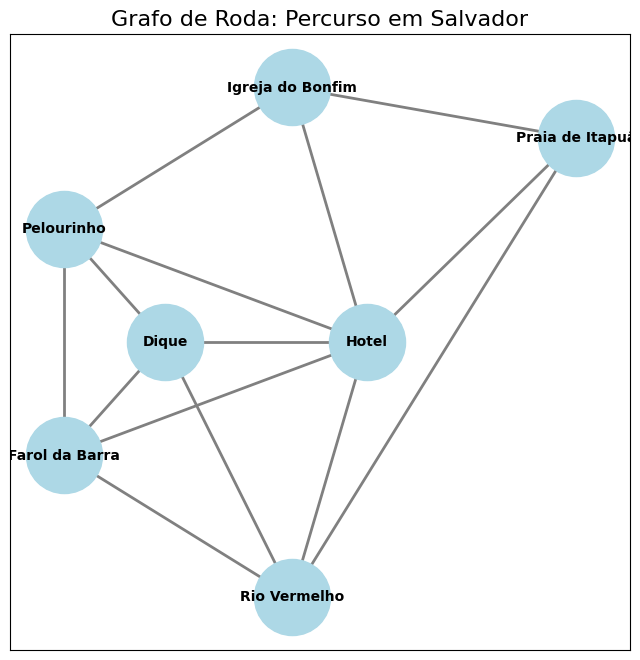

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo
G = nx.Graph()

# Definindo o centro do grafo (hotel) e os pontos turísticos
hotel = "Hotel"
pontos = [
    "Praia de Itapuã",
    "Igreja do Bonfim",
    "Pelourinho",
    "Farol da Barra",
    "Rio Vermelho",
]

# Adicionando as conexões do hotel aos pontos turísticos
for ponto in pontos:
    G.add_edge(hotel, ponto)

# Adicionando as conexões entre os pontos turísticos (aro da roda)
for i in range(len(pontos)):
    G.add_edge(pontos[i], pontos[(i + 1) % len(pontos)])

# Adicionando o ponto "Dique" e suas conexões específicas
dique = "Dique"
conexoes_dique = ["Pelourinho", "Hotel", "Farol da Barra", "Rio Vermelho"]
for conexao in conexoes_dique:
    G.add_edge(dique, conexao)

# Gerando o layout manualmente para garantir a forma desejada
pos = nx.circular_layout(G)  # Começamos com o layout circular

# Ajustando manualmente a posição do "Hotel" no centro e "Dique" dentro do aro
pos[hotel] = [0, 0]  # Centro do grafo
pos[dique] = [-0.6, -0.0]  # Posição do Dique dentro da roda

# Plotando o grafo
plt.figure(figsize=(8, 8))

# Desenhando todas as arestas (padrão)
nx.draw_networkx_edges(
    G, pos, edgelist=[(u, v) for u, v in G.edges() if dique not in (u, v)],
    edge_color="gray", width=2
)

# Destacando as arestas do "Dique" em outra cor
nx.draw_networkx_edges(
    G, pos, edgelist=[(dique, destino) for destino in conexoes_dique],
    edge_color="gray", width=2#, style="dashed"
)

# Desenhando os nós e os rótulos
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=3000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# Adicionando o título
plt.title("Grafo de Roda: Percurso em Salvador", fontsize=16)
plt.show()
